## Build a model to using the SONAR traditions of a Ship to Classify if the detected object is a ROCK or a MILE. 

- This project discusses some steps for a Binary Classification problem.

- Logistic regression uses the concept of predictive modeling as regression; 
- Therefore, it is called logistic regression, but is used to classify samples; it falls under the classification algorithm.

### 1. Load the necessary libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sonar.all-data.csv", header= None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
data.shape

(208, 61)

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

Note: 
- M --> Mine
- R --> Rock

In [6]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


### 2. Feature Selection:

- Divide the given 61 columns into two types:
- 1 Independent or feature variables 
- 2.Dependent or target variable

In [7]:
X = data.drop(columns= 60) # Independent/Feature Variable
y = data[60] # Dependent/Target Variable

In [8]:
X.shape, y.shape

((208, 60), (208,))

#### Plot a scatter plot to visualize the distribution on the Feature Variables either Rock or Mules

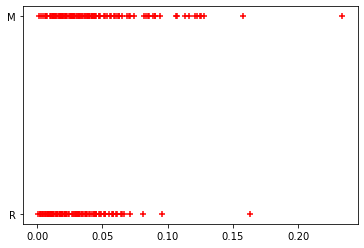

In [9]:
plt.scatter(X.iloc[:,1:2],y, marker="+", color= "r")

### 3. Splitting Data

- Splitting the dataset into a training set and a test set to understand model performance.
- Here, the Dataset is broken into two parts in a ratio of 80:20. It means 80% of data will be used for model training and 20% for model testing.
- Stratify= y splits the data w.r.t the Dependent Variable equally to avoid Data Imbalance.

In [10]:
#Split the data Into Training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)

In [11]:
#Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166, 60), (42, 60), (166,), (42,))

### 4. Deploying the model

- Import the class — Logistic Regression, Instantiate the model using the LogisticRegression() function.
- Then, fit your model on the train set using fit() and perform prediction on the test set using predict().


In [12]:
# Import the class -LogisticRegression
from sklearn.linear_model import LogisticRegression

#Instantiate the Model 
log_regr = LogisticRegression()

#Fit the model with the train data
log_regr.fit(X_train,y_train)

#Predict the test data
y_pred= log_regr.predict(X_test)

In [13]:
#Calculate the accuracy scores of Training and testing datasets
print("Accuracy scores of Training dataset : {}" .format(log_regr.score(X_train,y_train)))
print("Accuracy scores of Testing dataset : {}" .format(log_regr.score(X_test,y_test)))

Accuracy scores of Training dataset : 0.8192771084337349
Accuracy scores of Testing dataset : 0.8809523809523809


### 5. Model Evaluation using Confusion Matrix

- A confusion matrix is a 2X2(model is binary classification) table
- It is used to evaluate the performance of a classification model.
- It is the sum of the correct and incorrect predictions class-wise.(Rock and Mines)

In [14]:
# import the metrics class
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[20,  2],
       [ 3, 17]])

Text(0.5, 15.0, 'Predicted label')

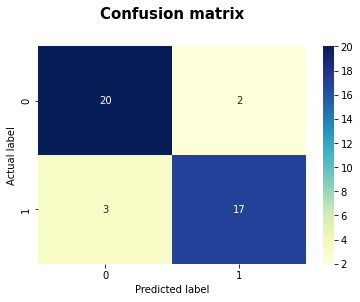

In [15]:
# create heatmap
import seaborn as sns
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1, fontweight="bold", fontsize= 15)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

- There are two classes Rock and Mines.
- Diagonal elements(20,17)represent accurate predictions.
- Non-Diagonal elements(2,3) represent inaccurate predictions.

#### Accuracy of Confusion Matrix

In [25]:
acc= metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy of Confusion Matrix:{}".format(acc))

Accuracy of Confusion Matrix:88.09523809523809


### 6. Model Evaluation using Input data

- Create a function that takes all the features of the output data, 
- Convert the row into an array, reshape the data into 1 row with its feature column
- and Predict the data class — Rock or Miles.

In [17]:
input_data = (0.0454,0.0472,0.0697,0.1021,0.1397,0.1493,0.1487,0.0771,0.1171,0.1675,0.2799,0.3323,0.4012,0.4296,0.5350,0.5411,0.6870,0.8045,0.9194,0.9169,1.0000,0.9972,0.9093,0.7918,0.6705,0.5324,0.3572,0.2484,0.3161,0.3775,0.3138,0.1713,0.2937,0.5234,0.5926,0.5437,0.4516,0.3379,0.3215,0.2178,0.1674,0.2634,0.2980,0.2037,0.1155,0.0919,0.0882,0.0228,0.0380,0.0142,0.0137,0.0120,0.0042,0.0238,0.0129,0.0084,0.0218,0.0321,0.0154,0.0053)
input_data = np.asarray(input_data)
input_data.shape

(60,)

In [18]:
input_data_reshape =input_data.reshape(1,-1)
input_data_reshape

array([[0.0454, 0.0472, 0.0697, 0.1021, 0.1397, 0.1493, 0.1487, 0.0771,
        0.1171, 0.1675, 0.2799, 0.3323, 0.4012, 0.4296, 0.535 , 0.5411,
        0.687 , 0.8045, 0.9194, 0.9169, 1.    , 0.9972, 0.9093, 0.7918,
        0.6705, 0.5324, 0.3572, 0.2484, 0.3161, 0.3775, 0.3138, 0.1713,
        0.2937, 0.5234, 0.5926, 0.5437, 0.4516, 0.3379, 0.3215, 0.2178,
        0.1674, 0.2634, 0.298 , 0.2037, 0.1155, 0.0919, 0.0882, 0.0228,
        0.038 , 0.0142, 0.0137, 0.012 , 0.0042, 0.0238, 0.0129, 0.0084,
        0.0218, 0.0321, 0.0154, 0.0053]])

In [19]:
input_data_reshape.shape

(1, 60)

In [20]:
prediction = log_regr.predict(input_data_reshape)
prediction

array(['M'], dtype=object)

In [21]:
def predict(row):
    #Convert the row into array
    arr = np.array(row)
    
    #reshape the data with 1 row and 60 feature column 
    rehaped_arr = arr.reshape(1,-1)
    
    #Predict this data with the model
    prediction = log_regr.predict(rehaped_arr)
    
    if prediction[0] == "R":
        print("The Object is Rock")
    else:
        print("The Object is Mine")

In [22]:
# Check the 101th row. It belongs to a "Mile" class
data.iloc[101:102] 

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
101,0.0335,0.0134,0.0696,0.118,0.0348,0.118,0.1948,0.1607,0.3036,0.4372,...,0.0244,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156,M


In [23]:
# Check the 1st row. It belongs to a "Rock" class
data.iloc[1:2]

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [24]:
# Call the predict function and verify its output class
predict(data.iloc[101:102,:-1])
predict(data.iloc[1:2,:-1])

The Object is Mine
The Object is Rock


- We are getting the Correct Output. 
- Hence Our Model has accurately classified its dependent Variable.